In [ ]:
# Load Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import MultipleLocator
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from gensim.models import word2vec
from google.colab import files


In [ ]:
# Read in Data
from google.colab import drive
drive.mount('/content/drive')

big_vul_dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/Final Project/test.csv')

display(big_vul_dataset.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(18864, 39)

In [ ]:
# Preview Data
pd.set_option('display.max_columns', None) # Show All Columns in Preview

#display(big_vul_dataset.head(n=5))
display(big_vul_dataset[['index', 'target', 'processed_func', 'vul_func_with_fix']].head(10))



,index,target,processed_func,vul_func_with_fix
0,73752,0,smb_ofile_delete(void *arg)\n{\n\tsmb_tree_t\t...,smb_ofile_delete(void *arg)\n{\n\tsmb_tree_t\t...
1,54196,0,static inline int acm_set_control(struct acm *...,static inline int acm_set_control(struct acm *...
2,169124,0,HTMLTreeBuilderSimulator::State HTMLTreeBuilde...,HTMLTreeBuilderSimulator::State HTMLTreeBuilde...
3,109551,0,int PrintWebViewHelper::PrintPreviewContext::t...,int PrintWebViewHelper::PrintPreviewContext::t...
4,78906,0,"static int yurex_open(struct inode *inode, str...","static int yurex_open(struct inode *inode, str..."
5,169746,0,exsltCryptoMd5Function (xmlXPathParserContextP...,exsltCryptoMd5Function (xmlXPathParserContextP...
6,145939,0,void DragEnd() {\n resizer_->CompleteDrag...,void DragEnd() {\n resizer_->CompleteDrag...
7,154252,0,error::Error GLES2DecoderImpl::HandleGetUnifor...,error::Error GLES2DecoderImpl::HandleGetUnifor...
8,38512,0,static int cma_rep_recv(struct rdma_id_private...,static int cma_rep_recv(struct rdma_id_private...
9,96336,0,bool CNB::ScheduleBuildSGListForTx()\n{\n A...,bool CNB::ScheduleBuildSGListForTx()\n{\n A...


In [ ]:
# View Label Distribution

display(pd.crosstab(index=big_vul_dataset['target'], columns='count'))

col_0,count
target,
0,17809
1,1055


In [ ]:
#print(big_vul_dataset.columns)

Index(['index', 'Access Gained', 'Attack Origin', 'Authentication Required',
       'Availability', 'CVE ID', 'CVE Page', 'CWE ID', 'Complexity',
       'Confidentiality', 'Integrity', 'Known Exploits', 'Publish Date',
       'Score', 'Summary', 'Update Date', 'Vulnerability Classification',
       'add_lines', 'codeLink', 'commit_id', 'commit_message', 'del_lines',
       'file_name', 'files_changed', 'func_after', 'func_before', 'lang',
       'lines_after', 'lines_before', 'parentID', 'patch', 'project',
       'project_after', 'project_before', 'target', 'vul_func_with_fix',
       'processed_func', 'flaw_line', 'flaw_line_index'],
      dtype='object')


In [ ]:
# Find Missing Values
linevul_na_vals = big_vul_dataset.isnull().sum()/len(big_vul_dataset)*100
linevul_na_vals = linevul_na_vals.to_frame()
linevul_na_vals.columns = ['% Missing']

linevul_na_vals.loc[linevul_na_vals['% Missing'] > 0]

,% Missing
Access Gained,6.870229
Attack Origin,6.870229
Authentication Required,6.870229
Availability,6.870229
CVE ID,6.568066
CVE Page,6.870229
CWE ID,18.548558
Complexity,6.870229
Confidentiality,6.870229
Integrity,6.870229


In [ ]:
cve_counts = big_vul_dataset['CVE ID'].value_counts()
data_cve = {}
df_cve = pd.DataFrame(data_cve)
index = 0
for i, v in cve_counts.items():
    df_cve.loc[index,"CVE ID"] = i
    df_cve.loc[index,"commitCount"] = v
    index +=1
df_cve

,CVE ID,commitCount
0,CVE-2016-5219,178.0
1,CVE-2014-1713,149.0
2,CVE-2012-5148,124.0
3,CVE-2013-7421,121.0
4,CVE-2011-2918,118.0
...,...,...
2664,CVE-2013-3222,1.0
2665,CVE-2016-2106,1.0
2666,CVE-2011-2518,1.0
2667,CVE-2016-8646,1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

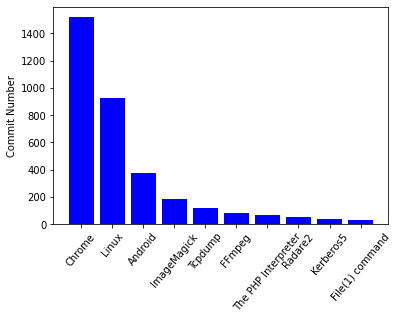

In [ ]:
x = ['Chrome',
 'Linux',
 'Android',
 'ImageMagick',
 'Tcpdump',
 'FFmpeg',
 'The PHP Interpreter',
 'Radare2',
 'Kerberos5',
 'File(1) command']
y=[1518,927,376,189,122,84,66,50,38,29]
plt.bar(x, y, color="blue")
plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.rcParams['savefig.dpi'] = 600 #picture pixels
plt.rcParams['figure.dpi'] = 600 #resolution
y_major_locator=MultipleLocator(200)
#Set the scale interval of the y-axis to 10, and store it in the variable
ax=plt.gca()
ax.yaxis.set_major_locator(y_major_locator)
#Set the main scale of the y-axisto a multiple of 10
ax.set_xticklabels(x, rotation=50)
plt.ylabel('Commit Number')

#plt.savefig("Number_of_commitsVSprojects.png")
#files.download("Number_of_commitsVSprojects.png") 

In [ ]:
top5_cwe = ['CWE-119',
 'CWE-20',
 'CWE-125',
 'CWE-200',
 'CWE-264']
top_10_project = ['Chrome',
                 'linux',
                 "Android",
                 "ImageMagick",
                 "tcpdump",
                 "FFmpeg",
                 "php-src",
                 "radare2",
                 "krb5",
                 "file"]
def printvulnXproject(project,top_k_cwe_dic):
    cve_series_count = big_vul_dataset[big_vul_dataset['project'] == project].drop_duplicates(["CVE ID"])["CVE ID"].value_counts()
    cwe_series_count = big_vul_dataset[big_vul_dataset['project'] == project].drop_duplicates(["CVE ID"])["CWE ID"].value_counts()
    vul_number = len(cve_series_count)
    top_5_cwe_count = 0
    for cwe in top5_cwe:
        cwe_count = cwe_series_count.get(key = cwe)
        print(cwe)
        if(cwe_count is None):
            cwe_count = 0
        top_5_cwe_count+=cwe_count
        top_k_cwe_dic[cwe].append(cwe_count)
    other_cwe_count = vul_number - top_5_cwe_count 
    print(top_k_cwe_dic)
top5_cwe_dic = {'CWE-264': [], 
                 'CWE-200': [], 
                 'CWE-125': [], 
                 'CWE-20': [],
                'CWE-119': []}
for project in top_10_project:
    printvulnXproject(project,top5_cwe_dic)

CWE-119
CWE-20
CWE-125
CWE-200
CWE-264
{'CWE-264': [38], 'CWE-200': [31], 'CWE-125': [11], 'CWE-20': [90], 'CWE-119': [83]}
CWE-119
CWE-20
CWE-125
CWE-200
CWE-264
{'CWE-264': [38, 64], 'CWE-200': [31, 73], 'CWE-125': [11, 18], 'CWE-20': [90, 63], 'CWE-119': [83, 95]}
CWE-119
CWE-20
CWE-125
CWE-200
CWE-264
{'CWE-264': [38, 64, 31], 'CWE-200': [31, 73, 18], 'CWE-125': [11, 18, 5], 'CWE-20': [90, 63, 20], 'CWE-119': [83, 95, 40]}
CWE-119
CWE-20
CWE-125
CWE-200
CWE-264
{'CWE-264': [38, 64, 31, 0], 'CWE-200': [31, 73, 18, 1], 'CWE-125': [11, 18, 5, 14], 'CWE-20': [90, 63, 20, 11], 'CWE-119': [83, 95, 40, 13]}
CWE-119
CWE-20
CWE-125
CWE-200
CWE-264
{'CWE-264': [38, 64, 31, 0, 0], 'CWE-200': [31, 73, 18, 1, 0], 'CWE-125': [11, 18, 5, 14, 41], 'CWE-20': [90, 63, 20, 11, 1], 'CWE-119': [83, 95, 40, 13, 2]}
CWE-119
CWE-20
CWE-125
CWE-200
CWE-264
{'CWE-264': [38, 64, 31, 0, 0, 0], 'CWE-200': [31, 73, 18, 1, 0, 1], 'CWE-125': [11, 18, 5, 14, 41, 7], 'CWE-20': [90, 63, 20, 11, 1, 3], 'CWE-119': [83

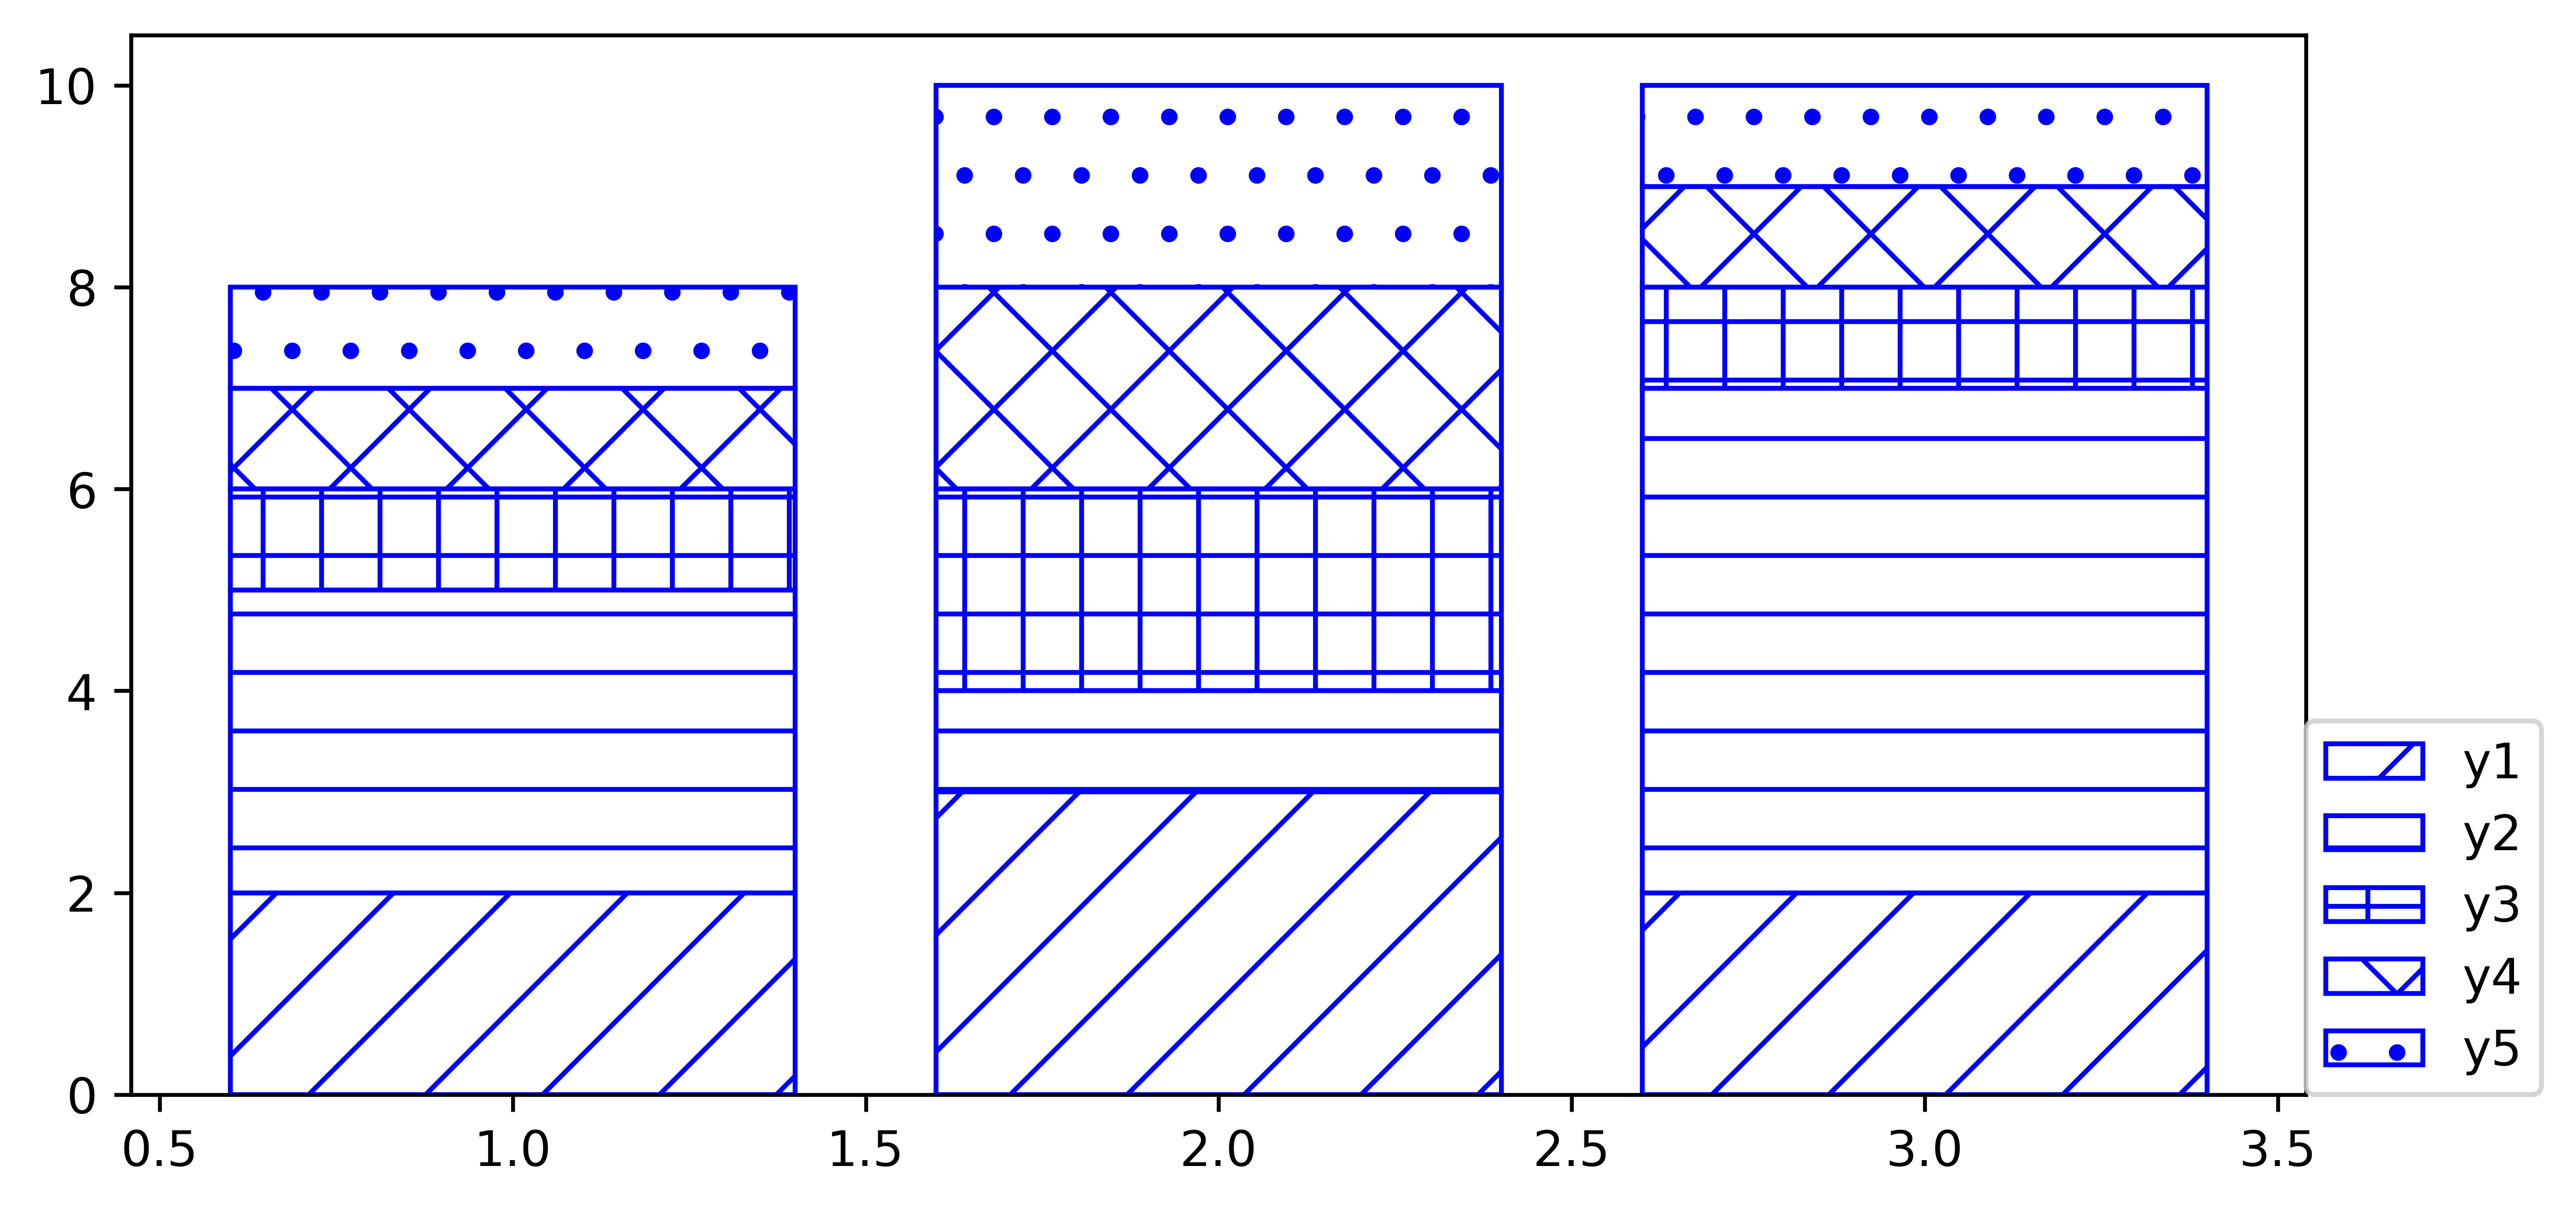

In [ ]:
x = [1,2,3]
y1 = np.array([2, 3, 2])
y2 = np.array([3, 1, 5])
y3 = np.array([1, 2, 1])
y4 = np.array([1, 2, 1])
y5 = np.array([1, 2, 1])
plt.bar(x, y1, hatch='/', color='white', edgecolor='blue',label='y1')
plt.bar(x, y2, bottom = y1,hatch='-', color='white', edgecolor='blue', label='y2')
plt.bar(x, y3,bottom = y1+y2, hatch='+', color='white', edgecolor='blue', label='y3')
plt.bar(x, y4, bottom = y1+y2+y3,hatch='x', color='white', edgecolor='blue', label='y4')
plt.bar(x, y5, bottom = y1+y2+y3+y4,hatch='.', color='white', edgecolor='blue', label='y5')
plt.legend(loc=[1, 0])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

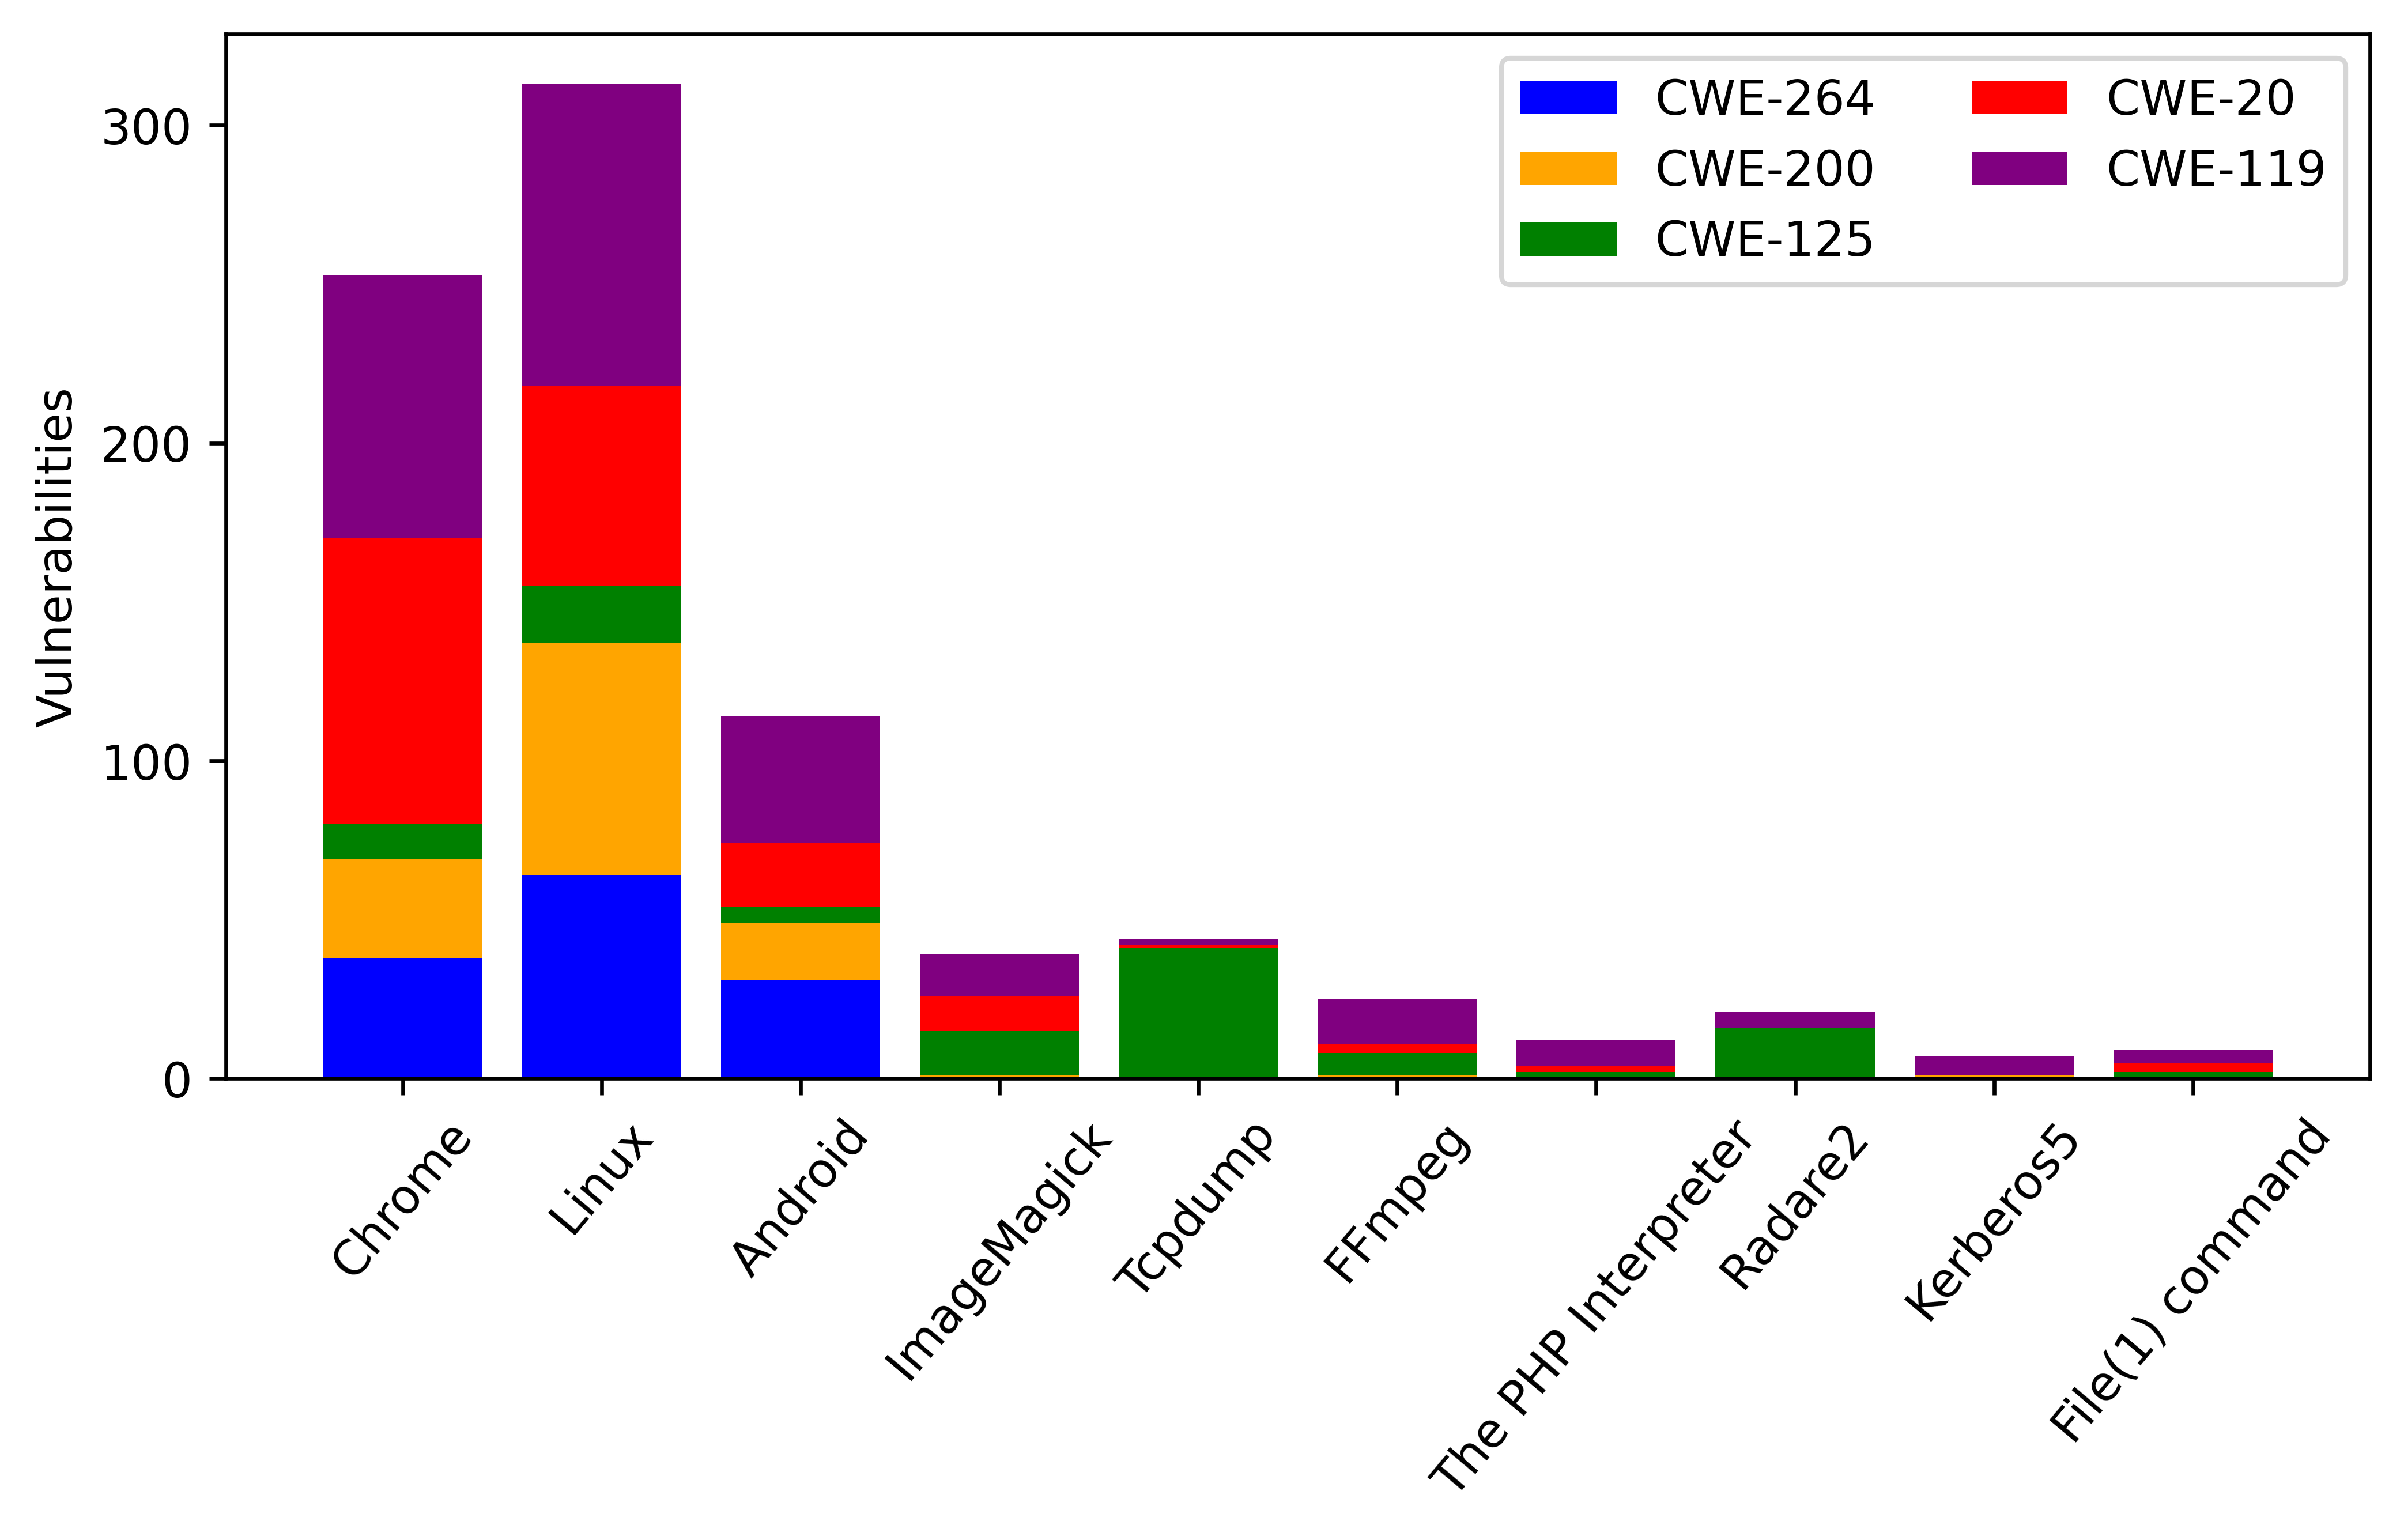

In [ ]:
 x = ['Chrome',
 'Linux',
 'Android',
 'ImageMagick',
 'Tcpdump',
 'FFmpeg',
 'The PHP Interpreter',
 'Radare2',
 'Kerberos5',
 'File(1) command']
i = 1
color_ = ['pink','blue', 'orange', 'green', 'red', 'purple', 'pink']
for key, value in top5_cwe_dic.items():
    # d.items(): list of d's (key, value) pairs, as 2-tuples
    # [('y', 2), ('x', 1), ('z', 3)]
    locals()['y'+str(i)] = np.array(value)
    bottom_ = 0
    for j in range(1,i):
        bottom_ +=locals()['y'+str(j)]
    if(i ==1):
        plt.bar(x, y1, color=color_[i], label=key)
    if(i ==2):
        plt.bar(x, y2, bottom=bottom_, color=color_[i], label=key)
    if(i ==3):
        plt.bar(x, y3, bottom=bottom_, color=color_[i], label=key)
    if(i ==4):
        plt.bar(x, y4, bottom=bottom_, color=color_[i], label=key)
    if(i ==5):
        plt.bar(x, y5, bottom=bottom_, color=color_[i], label=key)
    if(i ==6):
        plt.bar(x, y6, bottom=bottom_, color=color_[i], label=key)
    if(i ==7):
        plt.bar(x, y7, bottom=bottom_, color=cm(i//3*3.0/NUM_COLORS), label=key)
    if(i ==8):
        plt.bar(x, y8, bottom=bottom_, color=cm(i//3*3.0/NUM_COLORS), label=key)
    if(i ==9):
        plt.bar(x, y9, bottom=bottom_, color=cm(i//3*3.0/NUM_COLORS), label=key)
    if(i ==10):
        plt.bar(x, y10, bottom=bottom_, color=cm(i//3*3.0/NUM_COLORS), label=key)
    if(i ==11):
        plt.bar(x, y11, bottom=bottom_, color=cm(i//3*3.0/NUM_COLORS), label=key)
    if(i ==12):
        plt.bar(x, y12, bottom=bottom_, color=cm(i//3*3.0/NUM_COLORS), label=key)
    if(i ==13):
        plt.bar(x, y13, bottom=bottom_, color=cm(i//3*3.0/NUM_COLORS), label=key)
    if(i ==14):
        plt.bar(x, y14, bottom=bottom_, color=cm(i//3*3.0/NUM_COLORS), label=key)
    if(i ==15):
        plt.bar(x, y15, bottom=bottom_, color=cm(i//3*3.0/NUM_COLORS), label=key)
    if(i ==16):
        plt.bar(x, y16, bottom=bottom_, color=cm(i//3*3.0/NUM_COLORS), label=key)
    if(i ==17):
        plt.bar(x, y17, bottom=bottom_, color=cm(i//3*3.0/NUM_COLORS), label=key)
    if(i ==18):
        plt.bar(x, y18, bottom=bottom_, color=cm(i//3*3.0/NUM_COLORS), label=key)
    if(i ==19):
        plt.bar(x, y19, bottom=bottom_, color=cm(i//3*3.0/NUM_COLORS), label=key)
    if(i ==20):
        plt.bar(x, y20, bottom=bottom_, color=cm(i//3*3.0/NUM_COLORS), label=key)
    i +=1
plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600 
y_major_locator=MultipleLocator(100)

ax=plt.gca()
ax.yaxis.set_major_locator(y_major_locator)

ax.set_xticklabels(x, rotation=50)
plt.legend(loc="upper right",ncol=2)
plt.ylabel('Vulnerabilities')

#plt.savefig("Number_of_vulVStop10projectsCWEtypes.png")
#files.download("Number_of_vulVStop10projectsCWEtypes.png") 


In [ ]:
score_counts = big_vul_dataset['Vulnerability Classification'].value_counts()
data_cve = {}
sc_cve = pd.DataFrame(data_cve)
index = 0
for i, v in score_counts.items():
    sc_cve.loc[index,"Vulnerability Classification"] = i
    sc_cve.loc[index,"Project"] = v
    index +=1
sc_cve.head(5)

print('Dimensions before PCA:', sc_cve.shape)



Dimensions before PCA: (67, 2)


In [ ]:
def build_corpus(sc_cve):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['Vulnerability Classification']:
        for sentence in sc_cve[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(sc_cve)        
corpus

[['DoS', ''],
 ['DoS', 'Overflow', ''],
 ['+Info', ''],
 ['Bypass', ''],
 ['DoS'],
 ['Overflow', ''],
 ['+Priv', ''],
 ['Exec', 'Code', ''],
 ['Exec', 'Code', 'Overflow', ''],
 ['DoS', '+Priv', ''],
 ['DoS', 'Overflow', 'Mem.', 'Corr.', ''],
 ['DoS', 'Exec', 'Code', 'Overflow', ''],
 ['DoS', 'Exec', 'Code', 'Overflow', 'Mem.', 'Corr.', ''],
 ['DoS', 'Exec', 'Code', 'Overflow'],
 ['Exec', 'Code'],
 ['DoS', 'Overflow'],
 ['+Info'],
 ['DoS', '+Info', ''],
 ['Overflow', '+Priv', ''],
 ['DoS', 'Exec', 'Code'],
 ['Exec', 'Code', 'Overflow'],
 ['DoS', 'Exec', 'Code', ''],
 ['XSS', ''],
 ['Overflow'],
 ['DoS', 'Overflow', '+Priv', ''],
 ['DoS', 'Mem.', 'Corr.', ''],
 ['Bypass'],
 ['Dir.', 'Trav.', ''],
 ['DoS', 'Exec', 'Code', 'Mem.', 'Corr.', ''],
 ['Exec', 'Code', 'Overflow', 'Mem.', 'Corr.', ''],
 ['Bypass', '+Info', ''],
 ['DoS', '+Priv', 'Mem.', 'Corr.', ''],
 ['Overflow', 'Mem.', 'Corr.', ''],
 ['DoS', 'Exec', 'Code', 'Mem.', 'Corr.'],
 ['DoS', 'Exec', 'Code', 'Overflow', 'Mem.', 'Corr.'

In [ ]:
model = word2vec.Word2Vec(corpus, min_count=5)

model.wv['Exec']

array([-1.9610492e-03, -4.7765044e-03,  3.4709303e-03,  2.5302772e-03,
        2.2101826e-03,  2.7013998e-03,  3.7041681e-03,  1.3183532e-03,
        3.6613690e-03, -3.0346413e-03,  4.0358412e-03,  8.7320819e-07,
       -4.3796841e-04,  3.5390083e-03, -1.0979425e-03, -4.6711694e-03,
        1.7708649e-03,  3.8620722e-04, -2.8955019e-03,  7.3877344e-04,
        3.6734645e-03,  3.0442714e-03, -1.6587696e-03, -6.2957377e-05,
       -1.6495821e-03, -3.6732736e-04, -4.2019044e-03, -6.6430197e-04,
        4.4420487e-03,  2.1281468e-03,  1.1301162e-03,  7.3642138e-04,
        3.2604255e-03,  7.4447109e-04,  1.7501838e-03,  1.2167112e-03,
       -3.6381085e-03, -6.6152541e-04,  4.3846504e-03, -9.4528444e-04,
       -3.1647726e-03, -2.8944344e-03,  4.3896311e-03, -3.2342151e-03,
        2.3749825e-03,  1.3802592e-03,  1.6950454e-03,  2.7959392e-04,
        9.0191379e-04, -4.1958438e-03, -1.7637032e-03, -4.7585396e-03,
       -4.2951237e-03, -4.9648257e-03,  3.7298347e-03,  1.2077852e-03,
      

In [28]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

    

In [29]:
tsne_plot(model)

#plt.savefig("tsne_plot1.png")
#files.download("tsne_plot1.png") 

<ipython-input-28-3adcd7621451>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 4800x2400 with 0 Axes>

In [34]:
# A more selective model
model = word2vec.Word2Vec(corpus, min_count=15)

tsne_plot(model)

<ipython-input-28-3adcd7621451>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [36]:
# A less selective model
model = word2vec.Word2Vec(corpus, min_count=7)

tsne_plot(model)


<ipython-input-28-3adcd7621451>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [37]:
model.most_similar('DoS')

<ipython-input-37-b0a2ad2e0300>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar('DoS')


[('', 0.10826431214809418),
 ('Bypass', 0.058046579360961914),
 ('+Priv', 0.03795793652534485),
 ('Overflow', 0.02652866020798683),
 ('Mem.', -0.012852493673563004),
 ('Corr.', -0.017798788845539093),
 ('Code', -0.0237458236515522),
 ('Exec', -0.026488682255148888),
 ('+Info', -0.11222118139266968)]

In [38]:
model.most_similar('Overflow')

<ipython-input-38-1188bf24c4ff>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar('Overflow')


[('+Info', 0.1857527792453766),
 ('Corr.', 0.10382919758558273),
 ('', 0.08651452511548996),
 ('DoS', 0.02652866393327713),
 ('Mem.', 0.023838676512241364),
 ('Exec', -0.00589500367641449),
 ('Code', -0.02034740149974823),
 ('Bypass', -0.03933564946055412),
 ('+Priv', -0.14377537369728088)]

In [39]:
model.most_similar('Exec')

<ipython-input-39-68264f613122>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar('Exec')


[('+Priv', 0.20833328366279602),
 ('Mem.', 0.08798190206289291),
 ('Corr.', 0.047159988433122635),
 ('+Info', 0.020330093801021576),
 ('Code', 0.007355283945798874),
 ('Overflow', -0.00589500367641449),
 ('DoS', -0.026488685980439186),
 ('Bypass', -0.05946368724107742),
 ('', -0.08427375555038452)]